# 2.1

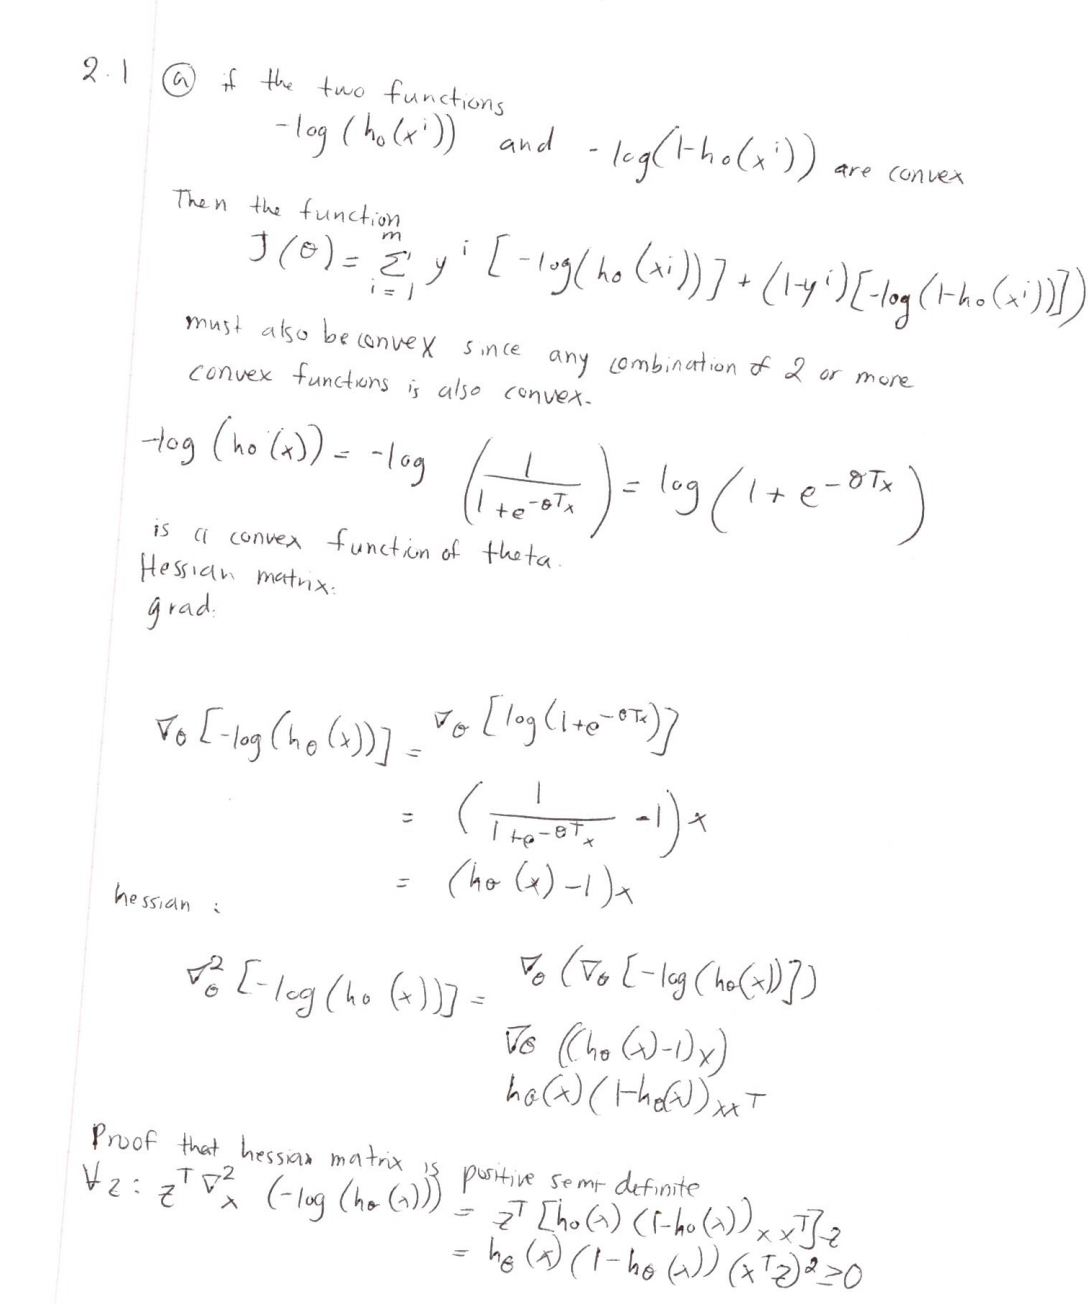


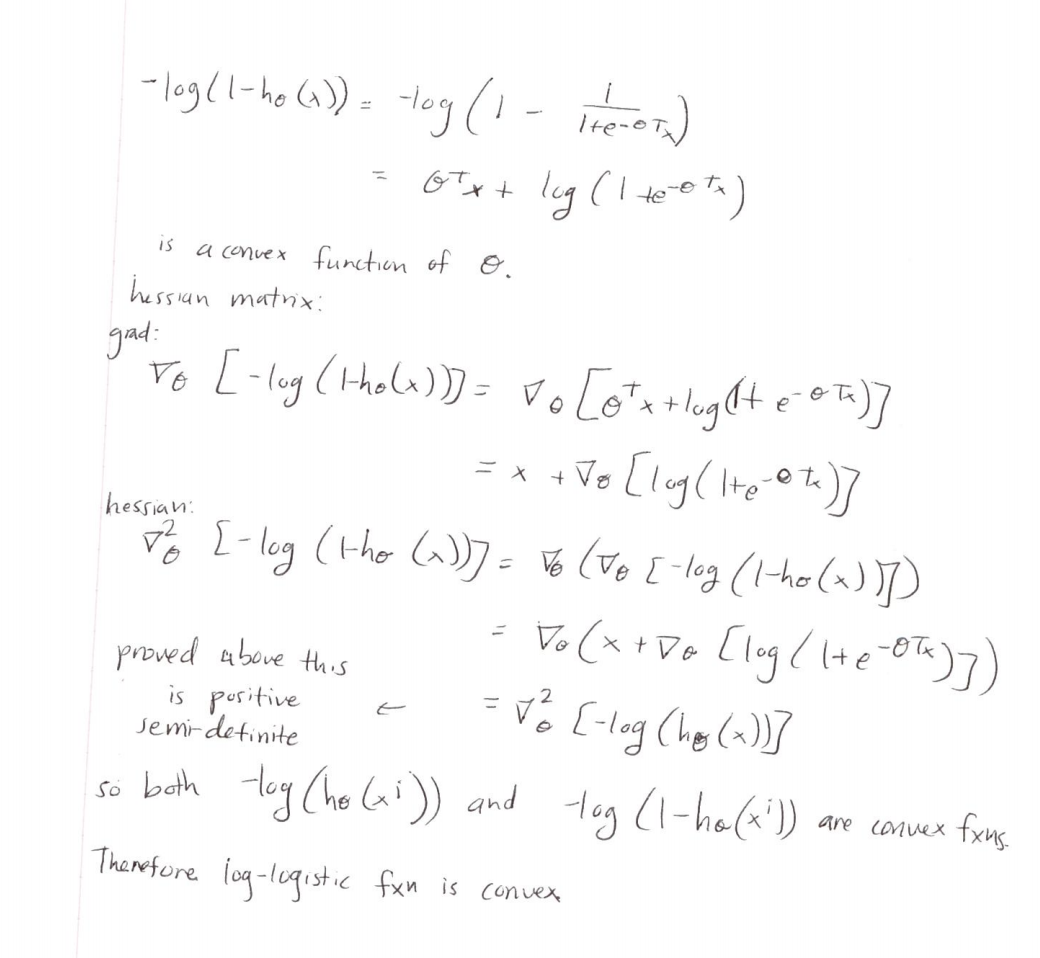

In [1]:
import numpy as np
import scipy.io as sio

In [2]:
mnist = sio.loadmat('mnist-original.mat')

In [3]:
data = mnist['data']
label=mnist['label']
data = (data - np.mean(data, axis=0))/(np.std(data, axis=0)+0.1)
train_x = data[:, 0:60000]
train_y = label[0, 0:60000]
test_x = data[:, 60000:70000]
test_y = label[0, 60000:70000]

classes = [0, 1]

idx_train = []
for i in range(train_y.shape[0]):
    if(train_y[i] in classes):
        idx_train=np.append(idx_train, i)
        
        
idx_test = []
for i in range(test_y.shape[0]):
    if(test_y[i] in classes):
        idx_test = np.append(idx_test, i)
        
train_x = np.transpose(train_x)
test_x = np.transpose(test_x)


trainx =[]
trainy=[]
testx=[]
testy=[]

for i in range(idx_train.shape[0]):
    trainx.append(train_x[np.int(idx_train[i]), :])
    if train_y[np.int(idx_train[i])] == classes[0]:
        trainy.append(0)
    else:
        trainy.append(1)

for i in range(idx_test.shape[0]):
    testx.append(test_x[np.int(idx_test[i]), :])
    if test_y[np.int(idx_test[i])] == classes[0]:
        testy.append(0)
    else:
        testy.append(1)
        
        
train_x = np.array(trainx)
train_y = np.array(trainy)
test_x = np.array(testx)
test_y = np.array(testy)

train_x = np.insert(train_x, 0, 1, axis=1)
test_x = np.insert(test_x, 0, 1, axis=1)


def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid_vec = np.vectorize(sigmoid)

def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    return w, b

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(12665, 785)
(12665,)
(2115, 785)
(2115,)


In [4]:
w, b = initialize_with_zeros(train_x.shape[1])

def gradient_step(w, b, X, Y):    
    m = X.shape[1]

    A =  sigmoid(w.T.dot(X.T) + b)  
    cost = -(Y*np.log(A) + (1 - Y)*np.log(1-A)).mean()

    dw = X.T.dot((A - Y).T)/m
    #db = (A - Y).mean()

    cost = np.squeeze(cost)
    
    grads = {"dw": dw }
             #"db": db}
    
    return grads, cost


num_iterations = 2000
learning_rate = 0.01
costs = []

for i in range(num_iterations):
    grads, cost = gradient_step(w, b, train_x, train_y)
        
    dw = grads["dw"]
    #db = grads["db"]
        
    w -= learning_rate * dw
    #b -= learning_rate * db
        
    if i % 100 == 0:
        costs.append(cost)
        
    if i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.005091
Cost after iteration 200: 0.003910
Cost after iteration 300: 0.003341
Cost after iteration 400: 0.002976
Cost after iteration 500: 0.002704
Cost after iteration 600: 0.002488
Cost after iteration 700: 0.002308
Cost after iteration 800: 0.002155
Cost after iteration 900: 0.002022
Cost after iteration 1000: 0.001906
Cost after iteration 1100: 0.001803
Cost after iteration 1200: 0.001710
Cost after iteration 1300: 0.001626
Cost after iteration 1400: 0.001549
Cost after iteration 1500: 0.001479
Cost after iteration 1600: 0.001415
Cost after iteration 1700: 0.001355
Cost after iteration 1800: 0.001300
Cost after iteration 1900: 0.001249


In [5]:
predict = np.round(sigmoid_vec(np.matmul(test_x.astype(float), w)))
predict = predict.flatten()
acc = 100.0*np.sum(test_y == predict)/test_y.shape[0]
print(acc)

99.95271867612293


# 2.2

In [6]:
import numpy as np

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [ ]:
mport numpy as np
import matplotlib.pyplot as plt

    # NAND gate features
    # note: x0 is a dummy variable for the bias term
    #     x0  x1  x2
    x = [[1., 0., 0.],                                  
         [1., 0., 1.],                                 
         [1., 1., 0.],                                  
         [1., 1., 1.]]

    # Desired outputs
    y = [1.,                                            
         1.,                                            
         1.,                                            
         0.]
    
    # Training the Perceptron
    #
    # x:   feature data
    # y:   outputs
    # z:   threshold
    # eta: learning rate
    # t:   number of iterations

    def perceptron_train(x, y, z, eta, t):

        # Initializing parameters for the Perceptron
        w = np.zeros(len(x[0]))        # weights
        n = 0                          

        # Initializing additional parameters to compute SSE
        yhat_vec = np.ones(len(y))     # vector for predictions
        errors = np.ones(len(y))       # vector for errors (actual - predictions)
        J = []                         # vector for the SSE cost function
 
        while n < t:                                  
            for i in xrange(0, len(x)):                 

                # summation step
                f = np.dot(x[i], w)                      

                # activation function
                if f > z:                               
                    yhat = 1.                               
                else:                                   
                    yhat = 0.
                yhat_vec[i] = yhat                              

                # updating the weights
                for j in xrange(0, len(w)):             
                    w[j] = w[j] + eta*(y[i]-yhat)*x[i][j]

                n += 1     

            # computing the sum-of-squared errors
            for i in xrange(0,len(y)):     
               errors[i] = (y[i]-yhat_vec[i])**2
            J.append(0.5*np.sum(errors))

        # function returns the weight vector, and sum-of-squared errors        
        return w, J

    z = 0.0     # threshold
    eta = 0.1   # learning rate
    t = 50      # number of iterations

    print('The weights are')
    print(perceptron_train ((x, y, z, eta, t)[0], "\n")

    print('The sum of squared erros are')
    print(perceptron_train(x, y, z, eta, t)[1]

    J = perceptron_train(x, y, z, eta, t)[1]     # pulling out the sum-of-squared errors from the tuple
    epoch = np.linspace(1,len(J),len(J))

    %matplotlib inline  
    plt.plot(epoch, J)
    plt.xlabel('Epoch')
    plt.ylabel('Sum-of-Squared Error')
    plt.title('Perceptron Convergence')

# 2.2d, e

In [14]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
 
# generate and prepare the dataset
def get_data():
	# generate dataset
	X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
	# split into train and test
	n_test = 500
	trainX, testX = X[:n_test, :], X[n_test:, :]
	trainy, testy = y[:n_test], y[n_test:]
	return trainX, trainy, testX, testy
 
# define and fit the model
def get_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(100, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model
 
# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)
 
 
# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

ModuleNotFoundError: No module named 'keras'